<a href="https://colab.research.google.com/github/Behnam-H/Neural-Network-Learning/blob/main/MNIST%20Digits%20Classification%20Neural%20Network%20in%20Python%2C%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


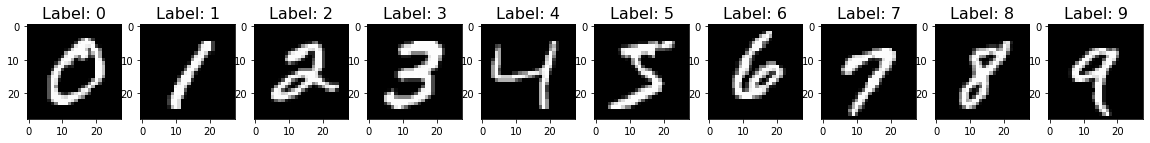

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Preparing Data

In [7]:
# Normalizing Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Reshape Data
#x_train[0].shape
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


# Creating Model - Fully Connected Neural Network

In [9]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [11]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 9ms/step - loss: 1.0640 - accuracy: 0.6833
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2442 - accuracy: 0.9272
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1709 - accuracy: 0.9514
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1382 - accuracy: 0.9589
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1115 - accuracy: 0.9657
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0958 - accuracy: 0.9720
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0773 - accuracy: 0.9774
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0594 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0505 - accuracy: 0.98

# Ecaluate

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9776
Test Loss: 0.07250416278839111, Test Accuracy: 0.9775999784469604


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[8.4849376e-08 1.4282371e-06 2.1027319e-05 ... 9.9989939e-01
  8.1772612e-07 7.6227907e-06]
 [2.1776309e-07 2.8159376e-04 9.9961567e-01 ... 5.9103269e-09
  3.0847873e-06 2.4727581e-10]
 [4.7041663e-06 9.9885356e-01 2.3570650e-04 ... 4.0101315e-04
  3.8323044e-05 3.6569691e-06]
 ...
 [1.9911153e-09 3.3320827e-08 1.3711294e-09 ... 6.6793660e-07
  3.0986419e-06 7.7803179e-06]
 [2.5835671e-09 2.5164790e-10 4.1250744e-12 ... 1.7722686e-08
  4.4888993e-06 5.7118132e-09]
 [4.0805681e-08 1.1300297e-11 1.2005398e-08 ... 7.2149768e-13
  1.1946002e-09 1.3438073e-12]]
[7 2 1 ... 4 5 6]


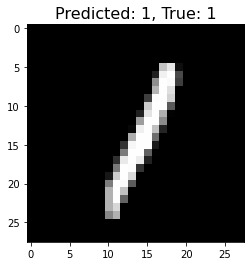

In [15]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}". format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

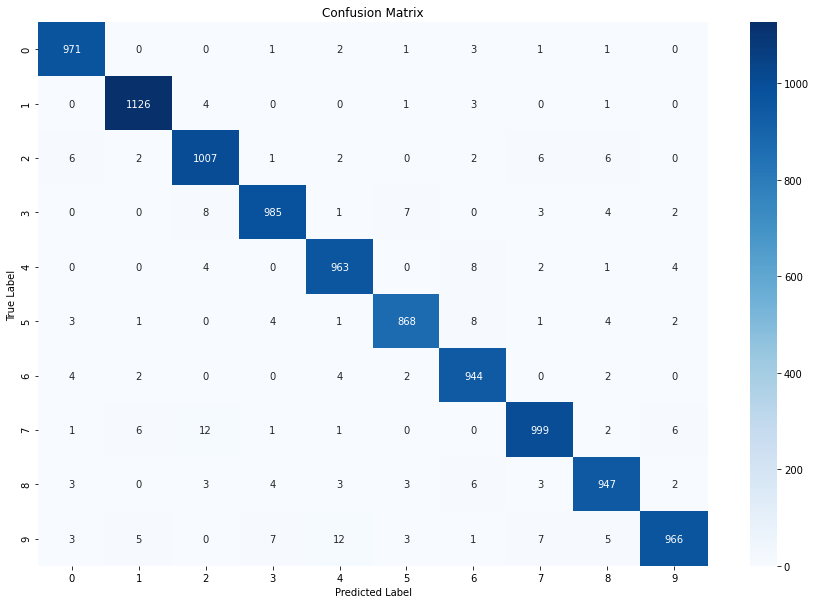

In [24]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigating Some of Errors

In [32]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = y_test[errors]

In [33]:
y_pred_classes_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_classes_errors_probability - true_probability_errors

# Get list of indices of sorted diffrences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 last ones

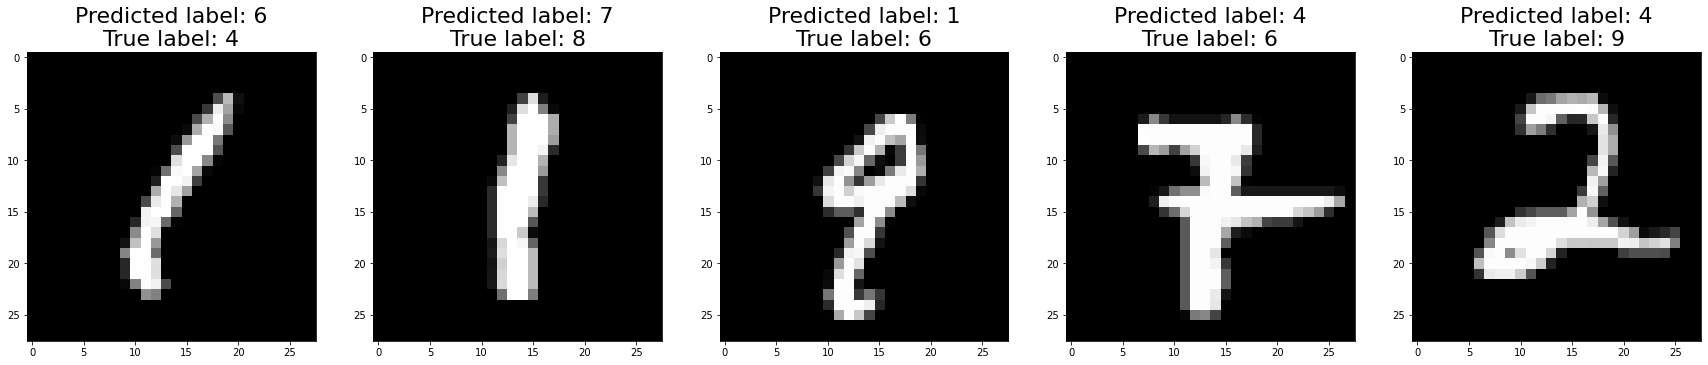

In [34]:
# Showing Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label: {}\nTrue label: {}". format(y_p, y_t), fontsize=22)